In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [9]:
df_train= pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/final_train_imputer.csv')
df_test= pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/final_test_imputer.csv')

In [ ]:
df_trai

In [6]:
nb_c = ComplementNB()
d_tree = DecisionTreeClassifier()
mlp_c = MLPClassifier()
voting_1 = VotingClassifier(estimators= [('nb',nb_c),('tree', d_tree),('mlp',mlp_c)], voting = 'soft')

In [10]:
df_train.columns

Index(['enrollee_id', 'city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours', 'target'],
      dtype='object')

In [12]:
voting_1.fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)

VotingClassifier(estimators=[('nb', ComplementNB()),
                             ('tree', DecisionTreeClassifier()),
                             ('mlp', MLPClassifier())],
                 voting='soft')

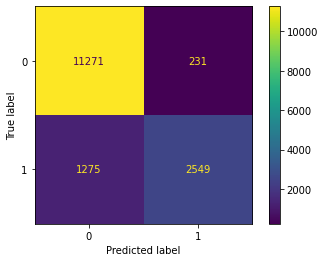

In [13]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target,voting_1.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

In [16]:
metrics.roc_auc_score(df_train.target,voting_1.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.9432394170669973

In [19]:
df_target = pd.DataFrame()
df_target['enrollee_id'] = df_test['enrollee_id'].astype('int32')
df_target['target'] = voting_1.predict_proba(df_test[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1]

In [20]:
df_target.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/10.csv', index = False)

In [21]:
nb_c.fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)

ComplementNB()

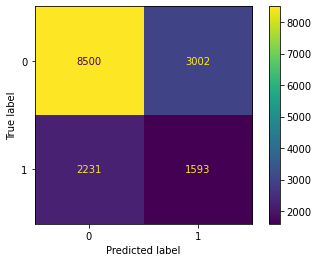

In [22]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target,nb_c.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

In [23]:
metrics.roc_auc_score(df_train.target,nb_c.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.6111187275780308

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb_c= GradientBoostingClassifier(learning_rate=0.4, n_estimators=56)

In [83]:
gb_c.fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=56)

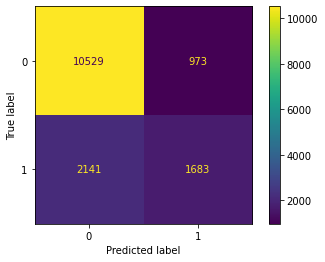

In [74]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target,gb_c.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

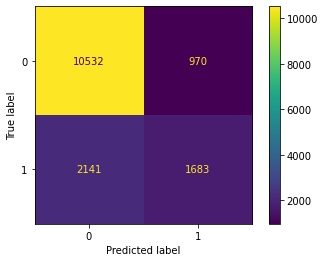

In [77]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target,gb_c.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

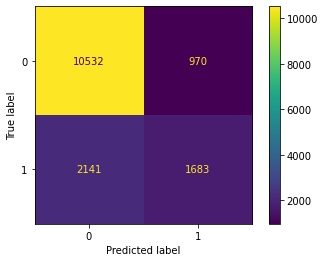

In [84]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_train.target,gb_c.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']]))).plot()

In [85]:
metrics.roc_auc_score(df_train.target,gb_c.predict_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.7923037557048473

In [31]:
metrics.roc_auc_score(df_train.target,gb_c.predict_log_proba(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1])

0.7806432404151653

In [86]:
df_target = pd.DataFrame()
df_target['enrollee_id'] = df_test['enrollee_id'].astype('int32')
df_target['target'] = gb_c.predict_proba(df_test[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])[:,1]
df_target.to_csv('/content/drive/MyDrive/Ironhack/Proyecto4/dapt-sept2022/13.csv', index = False)

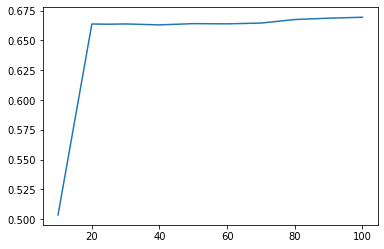

In [60]:
learning_rates = [10, 20, 25, 30, 40, 50, 60, 70, 80, 90,100]
train_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(n_estimators=eta)
   model.fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)
   train_pred = model.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(df_train.target, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(learning_rates, train_results)


In [61]:
train_results

[0.5036617699377731,
 0.6638229734832364,
 0.66364977275191,
 0.6638674672914807,
 0.663080220176371,
 0.6641252221734768,
 0.6639496341913249,
 0.6646044229891981,
 0.6675710027508405,
 0.6687043102927707,
 0.6694898522287192]

In [ ]:
learning_rates = [0.3, 0.4, 0.25, 0.1, 0.05, 0.01]
train_results = []
for eta in learning_rates:
   model = GradientBoostingClassifier(learning_rate=eta)
   model.fit(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']], df_train.target)
   train_pred = model.predict(df_train[['city_development', 'relevant_experience',
       'enrolled_university', 'education_level', 'training_hours']])
   false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(df_train.target, train_pred)
   roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(learning_rates, train_results)